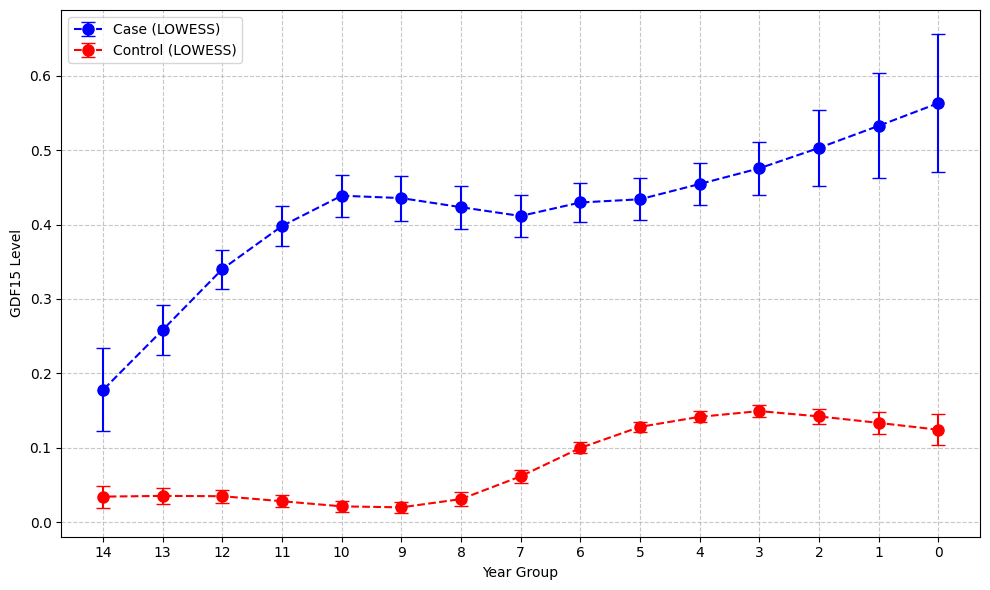

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


matched_data_path = '/code/Figure2/Figure2c/matched_samples_GDF15_v2.csv'
matched_data = pd.read_csv(matched_data_path)


raw_data1 = matched_data[matched_data['dataset'] == "A"][['Year_group', 'GDF15']].sort_values('Year_group')
raw_data2 = matched_data[matched_data['dataset'] == "B"][['Year_group', 'GDF15']].sort_values('Year_group')


def lowess_with_bootstrap(x, y, frac=0.3, n_bootstrap=100):
    
   
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
    
    bootstrap_preds = []
    
    
    for _ in range(n_bootstrap):
        
        sample_idx = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x[sample_idx]
        y_sample = y[sample_idx]
        
       
        lowess = sm.nonparametric.lowess(y_sample, x_sample, frac=frac)
        x_pred = lowess[:, 0]
        y_pred = lowess[:, 1]
        
        
        x_unique = np.unique(x)
        y_interp = np.interp(x_unique, x_pred, y_pred)
        bootstrap_preds.append(y_interp)
    
    
    pred_mean = np.mean(bootstrap_preds, axis=0)
    pred_se = np.std(bootstrap_preds, axis=0, ddof=1)  
    
    return x_unique, pred_mean, pred_se


frac = 0.4  


x1 = raw_data1['Year_group'].values
y1 = raw_data1['GDF15'].values
x1_unique, y1_mean, y1_se = lowess_with_bootstrap(x1, y1, frac=frac)


x2 = raw_data2['Year_group'].values
y2 = raw_data2['GDF15'].values
x2_unique, y2_mean, y2_se = lowess_with_bootstrap(x2, y2, frac=frac)


plt.figure(figsize=(10, 6))


plt.errorbar(x1_unique, y1_mean, yerr=y1_se, 
             label='Case (LOWESS)', fmt='o--', color='blue', 
             capsize=5, markersize=8)


plt.errorbar(x2_unique, y2_mean, yerr=y2_se, 
             label='Control (LOWESS)', fmt='o--', color='red', 
             capsize=5, markersize=8)


plt.gca().invert_xaxis()
plt.xticks(np.union1d(x1_unique, x2_unique))  
plt.xlabel('Year Group')
plt.ylabel('GDF15 Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('/results/figure2cGDF15_trajectory.pdf', 
            format='pdf', bbox_inches='tight')

plt.show()

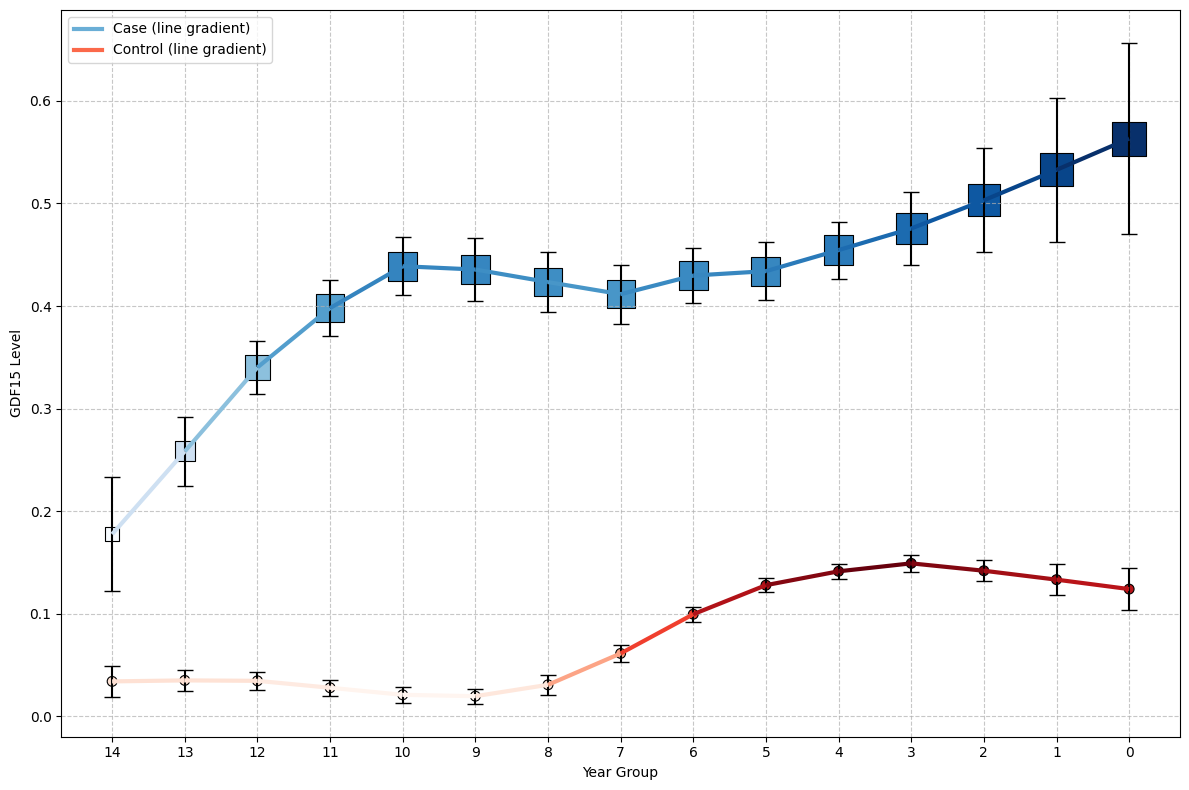

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def plot_gradient_line(ax, x, y, cmap_name, line_width=3):
    
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    lc = LineCollection(
        segments,
        cmap=plt.get_cmap(cmap_name),
        norm=norm,
        linewidth=line_width
    )
    lc.set_array(y)  
    ax.add_collection(lc)
    return lc


fig, ax = plt.subplots(figsize=(12, 8))  # 放大画布

 
min_size, max_size = 100, 600
if y1_mean.max() != y1_mean.min():
    y1_norm = (y1_mean - y1_mean.min()) / (y1_mean.max() - y1_mean.min())
else:
    y1_norm = np.full_like(y1_mean, 0.5)
s1 = min_size + (max_size - min_size) * y1_norm


ax.errorbar(
    x1_unique, y1_mean, yerr=y1_se,
    fmt='none',
    ecolor='black',     
    elinewidth=1.5,
    capsize=6
)


sc1 = ax.scatter(
    x1_unique, y1_mean,
    s=s1,                        # 每个点的面积
    c=y1_mean,                   # 按 y1_mean 映射颜色
    cmap='Blues',                # 选择 Blues 渐变
    marker='s',                  # 's' 对应正方形
    edgecolors='black',          # 轮廓线设为黑色
    linewidths=0.8               # 轮廓线宽度
)


gradient_a = plot_gradient_line(ax, x1_unique, y1_mean, cmap_name='Blues', line_width=3)




min_size, max_size = 50, 50
if y2_mean.max() != y2_mean.min():
    y2_norm = (y2_mean - y2_mean.min()) / (y2_mean.max() - y2_mean.min())
else:
    y2_norm = np.full_like(y2_mean, 0.5)
s2 = min_size + (max_size - min_size) * y2_norm


ax.errorbar(
    x2_unique, y2_mean, yerr=y2_se,
    fmt='none',
    ecolor='black',
    elinewidth=1.5,
    capsize=6
)


sc2 = ax.scatter(
    x2_unique, y2_mean,
    s=s2,
    c=y2_mean,
    cmap='Reds',
    marker='o',                 
    edgecolors='black',
    linewidths=0.8
)


gradient_b = plot_gradient_line(ax, x2_unique, y2_mean, cmap_name='Reds', line_width=3)



ax.invert_xaxis()
ax.set_xticks(np.union1d(x1_unique, x2_unique))
ax.set_xlabel('Year Group')
ax.set_ylabel('GDF15 Level')
ax.grid(True, linestyle='--', alpha=0.7)


import matplotlib.lines as mlines
proxy_a = mlines.Line2D([], [], color=plt.get_cmap('Blues')(0.5), lw=3, label='Case (line gradient)')
proxy_b = mlines.Line2D([], [], color=plt.get_cmap('Reds')(0.5), lw=3, label='Control (line gradient)')
ax.legend(handles=[proxy_a, proxy_b], loc='best')

plt.tight_layout()

plt.savefig('/results/figure2ccGDF15_trajectory.pdf', format='pdf', bbox_inches='tight')
plt.show()


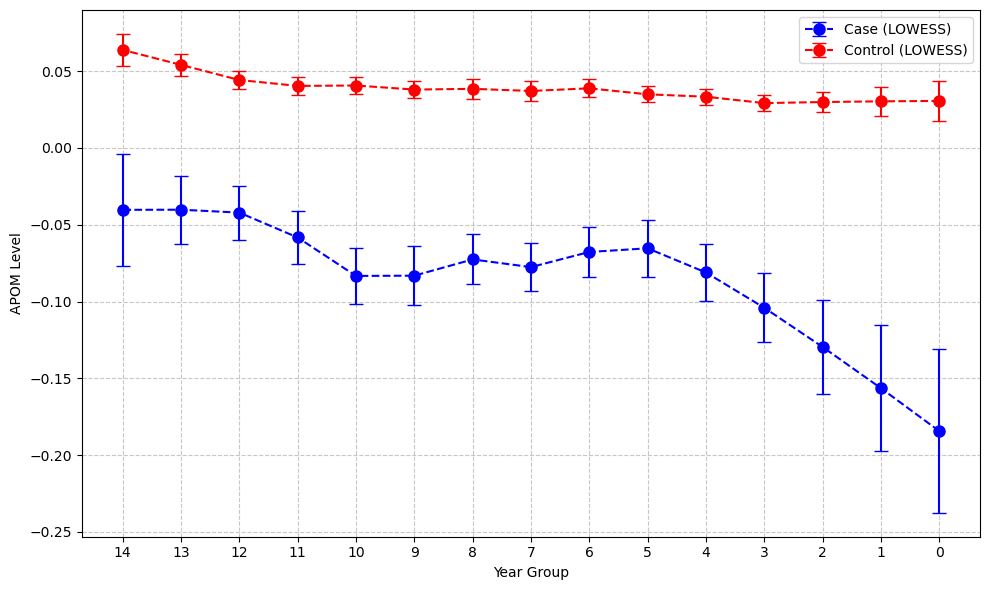

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


matched_data_path = '/code/Figure2/Figure2c/matched_samples_APOM_v2.csv'
matched_data = pd.read_csv(matched_data_path)


raw_data1 = matched_data[matched_data['dataset'] == "A"][['Year_group', 'APOM']].sort_values('Year_group')
raw_data2 = matched_data[matched_data['dataset'] == "B"][['Year_group', 'APOM']].sort_values('Year_group')


def lowess_with_bootstrap(x, y, frac=0.3, n_bootstrap=100):
    
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
    
    bootstrap_preds = []
    
    
    for _ in range(n_bootstrap):
        
        sample_idx = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x[sample_idx]
        y_sample = y[sample_idx]
        
        
        lowess = sm.nonparametric.lowess(y_sample, x_sample, frac=frac)
        x_pred = lowess[:, 0]
        y_pred = lowess[:, 1]
        
        
        x_unique = np.unique(x)
        y_interp = np.interp(x_unique, x_pred, y_pred)
        bootstrap_preds.append(y_interp)
    
    
    pred_mean = np.mean(bootstrap_preds, axis=0)
    pred_se = np.std(bootstrap_preds, axis=0, ddof=1)  
    
    return x_unique, pred_mean, pred_se


frac = 0.4 


x1 = raw_data1['Year_group'].values
y1 = raw_data1['APOM'].values
x1_unique, y1_mean, y1_se = lowess_with_bootstrap(x1, y1, frac=frac)


x2 = raw_data2['Year_group'].values
y2 = raw_data2['APOM'].values
x2_unique, y2_mean, y2_se = lowess_with_bootstrap(x2, y2, frac=frac)


plt.figure(figsize=(10, 6))


plt.errorbar(x1_unique, y1_mean, yerr=y1_se, 
             label='Case (LOWESS)', fmt='o--', color='blue', 
             capsize=5, markersize=8)


plt.errorbar(x2_unique, y2_mean, yerr=y2_se, 
             label='Control (LOWESS)', fmt='o--', color='red', 
             capsize=5, markersize=8)


plt.gca().invert_xaxis()
plt.xticks(np.union1d(x1_unique, x2_unique))  
plt.xlabel('Year Group')
plt.ylabel('APOM Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('/results/APOM_trajectory.pdf', 
            format='pdf', bbox_inches='tight')

plt.show()

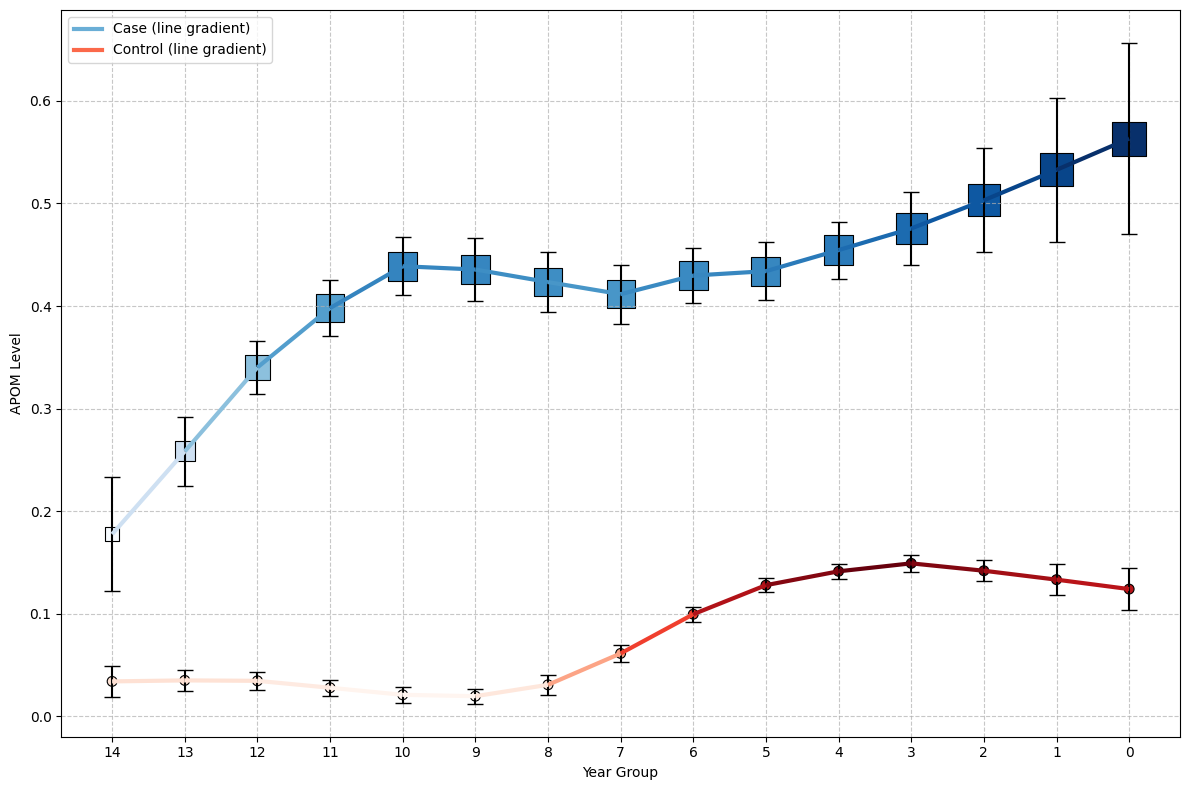

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def plot_gradient_line(ax, x, y, cmap_name, line_width=3):
   
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    lc = LineCollection(
        segments,
        cmap=plt.get_cmap(cmap_name),
        norm=norm,
        linewidth=line_width
    )
    lc.set_array(y)  
    ax.add_collection(lc)
    return lc


fig, ax = plt.subplots(figsize=(12, 8))  


min_size, max_size = 100, 600
if y1_mean.max() != y1_mean.min():
    y1_norm = (y1_mean - y1_mean.min()) / (y1_mean.max() - y1_mean.min())
else:
    y1_norm = np.full_like(y1_mean, 0.5)
s1 = min_size + (max_size - min_size) * y1_norm


ax.errorbar(
    x1_unique, y1_mean, yerr=y1_se,
    fmt='none',
    ecolor='black',     
    elinewidth=1.5,
    capsize=6
)


sc1 = ax.scatter(
    x1_unique, y1_mean,
    s=s1,                        
    c=y1_mean,                   
    cmap='Blues',                
    marker='s',                 
    edgecolors='black',         
    linewidths=0.8              
)


gradient_a = plot_gradient_line(ax, x1_unique, y1_mean, cmap_name='Blues', line_width=3)




min_size, max_size = 50, 50
if y2_mean.max() != y2_mean.min():
    y2_norm = (y2_mean - y2_mean.min()) / (y2_mean.max() - y2_mean.min())
else:
    y2_norm = np.full_like(y2_mean, 0.5)
s2 = min_size + (max_size - min_size) * y2_norm


ax.errorbar(
    x2_unique, y2_mean, yerr=y2_se,
    fmt='none',
    ecolor='black',
    elinewidth=1.5,
    capsize=6
)


sc2 = ax.scatter(
    x2_unique, y2_mean,
    s=s2,
    c=y2_mean,
    cmap='Reds',
    marker='o',                  
    edgecolors='black',
    linewidths=0.8
)

gradient_b = plot_gradient_line(ax, x2_unique, y2_mean, cmap_name='Reds', line_width=3)


ax.invert_xaxis()
ax.set_xticks(np.union1d(x1_unique, x2_unique))
ax.set_xlabel('Year Group')
ax.set_ylabel('APOM Level')
ax.grid(True, linestyle='--', alpha=0.7)


import matplotlib.lines as mlines
proxy_a = mlines.Line2D([], [], color=plt.get_cmap('Blues')(0.5), lw=3, label='Case (line gradient)')
proxy_b = mlines.Line2D([], [], color=plt.get_cmap('Reds')(0.5), lw=3, label='Control (line gradient)')
ax.legend(handles=[proxy_a, proxy_b], loc='best')

plt.tight_layout()

plt.savefig('/results/Figure2ccAPOM_trajectory.pdf', format='pdf', bbox_inches='tight')
plt.show()

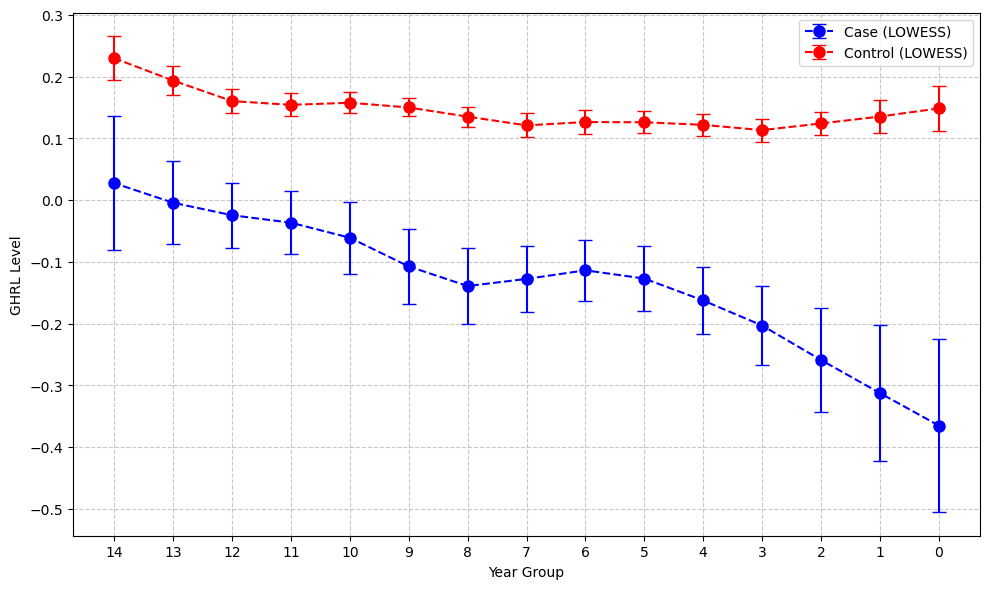

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


matched_data_path = '/code/Figure2/Figure2c/matched_samples_GHRL_v2.csv'
matched_data = pd.read_csv(matched_data_path)

raw_data1 = matched_data[matched_data['dataset'] == "A"][['Year_group', 'GHRL']].sort_values('Year_group')
raw_data2 = matched_data[matched_data['dataset'] == "B"][['Year_group', 'GHRL']].sort_values('Year_group')


def lowess_with_bootstrap(x, y, frac=0.3, n_bootstrap=100):

   
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
   
    bootstrap_preds = []
    
   
    for _ in range(n_bootstrap):
       
        sample_idx = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x[sample_idx]
        y_sample = y[sample_idx]
        
       
        lowess = sm.nonparametric.lowess(y_sample, x_sample, frac=frac)
        x_pred = lowess[:, 0]
        y_pred = lowess[:, 1]
        
        
        x_unique = np.unique(x)
        y_interp = np.interp(x_unique, x_pred, y_pred)
        bootstrap_preds.append(y_interp)
    
   
    pred_mean = np.mean(bootstrap_preds, axis=0)
    pred_se = np.std(bootstrap_preds, axis=0, ddof=1)  
    
    return x_unique, pred_mean, pred_se


frac = 0.4  

x1 = raw_data1['Year_group'].values
y1 = raw_data1['GHRL'].values
x1_unique, y1_mean, y1_se = lowess_with_bootstrap(x1, y1, frac=frac)


x2 = raw_data2['Year_group'].values
y2 = raw_data2['GHRL'].values
x2_unique, y2_mean, y2_se = lowess_with_bootstrap(x2, y2, frac=frac)


plt.figure(figsize=(10, 6))


plt.errorbar(x1_unique, y1_mean, yerr=y1_se, 
             label='Case (LOWESS)', fmt='o--', color='blue', 
             capsize=5, markersize=8)


plt.errorbar(x2_unique, y2_mean, yerr=y2_se, 
             label='Control (LOWESS)', fmt='o--', color='red', 
             capsize=5, markersize=8)


plt.gca().invert_xaxis()
plt.xticks(np.union1d(x1_unique, x2_unique)) 
plt.xlabel('Year Group')
plt.ylabel('GHRL Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('/results/Figure2ccGHRL_trajectory.pdf', 
            format='pdf', bbox_inches='tight')

plt.show()

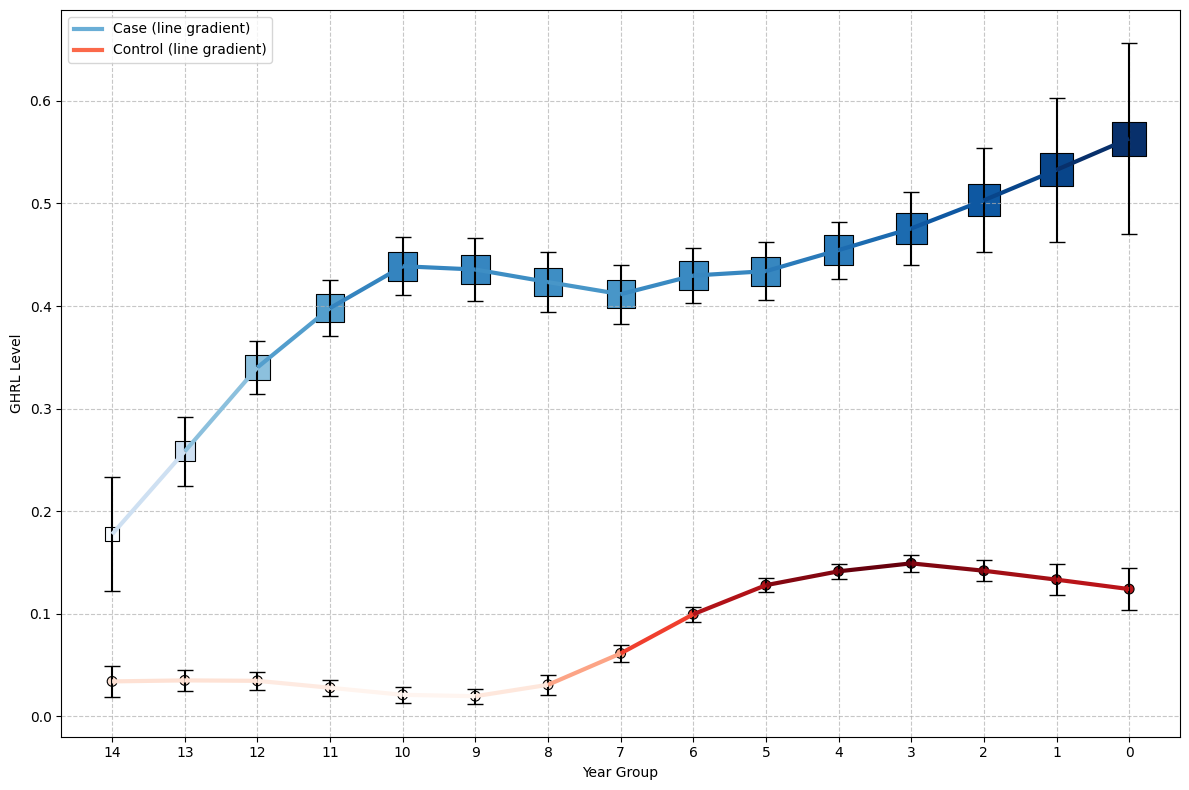

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def plot_gradient_line(ax, x, y, cmap_name, line_width=3):
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    lc = LineCollection(
        segments,
        cmap=plt.get_cmap(cmap_name),
        norm=norm,
        linewidth=line_width
    )
    lc.set_array(y) 
    ax.add_collection(lc)
    return lc


fig, ax = plt.subplots(figsize=(12, 8))  


min_size, max_size = 100, 600
if y1_mean.max() != y1_mean.min():
    y1_norm = (y1_mean - y1_mean.min()) / (y1_mean.max() - y1_mean.min())
else:
    y1_norm = np.full_like(y1_mean, 0.5)
s1 = min_size + (max_size - min_size) * y1_norm


ax.errorbar(
    x1_unique, y1_mean, yerr=y1_se,
    fmt='none',
    ecolor='black',     
    elinewidth=1.5,
    capsize=6
)


sc1 = ax.scatter(
    x1_unique, y1_mean,
    s=s1,                        
    c=y1_mean,                   
    cmap='Blues',                
    marker='s',                  
    edgecolors='black',          
    linewidths=0.8               
)


gradient_a = plot_gradient_line(ax, x1_unique, y1_mean, cmap_name='Blues', line_width=3)




min_size, max_size = 50, 50
if y2_mean.max() != y2_mean.min():
    y2_norm = (y2_mean - y2_mean.min()) / (y2_mean.max() - y2_mean.min())
else:
    y2_norm = np.full_like(y2_mean, 0.5)
s2 = min_size + (max_size - min_size) * y2_norm


ax.errorbar(
    x2_unique, y2_mean, yerr=y2_se,
    fmt='none',
    ecolor='black',
    elinewidth=1.5,
    capsize=6
)


sc2 = ax.scatter(
    x2_unique, y2_mean,
    s=s2,
    c=y2_mean,
    cmap='Reds',
    marker='o',                 
    edgecolors='black',
    linewidths=0.8
)


gradient_b = plot_gradient_line(ax, x2_unique, y2_mean, cmap_name='Reds', line_width=3)

 
ax.invert_xaxis()
ax.set_xticks(np.union1d(x1_unique, x2_unique))
ax.set_xlabel('Year Group')
ax.set_ylabel('GHRL Level')
ax.grid(True, linestyle='--', alpha=0.7)


import matplotlib.lines as mlines
proxy_a = mlines.Line2D([], [], color=plt.get_cmap('Blues')(0.5), lw=3, label='Case (line gradient)')
proxy_b = mlines.Line2D([], [], color=plt.get_cmap('Reds')(0.5), lw=3, label='Control (line gradient)')
ax.legend(handles=[proxy_a, proxy_b], loc='best')

plt.tight_layout()

plt.savefig('/results/figure2cGHRL_trajectory.pdf', format='pdf', bbox_inches='tight')
plt.show()

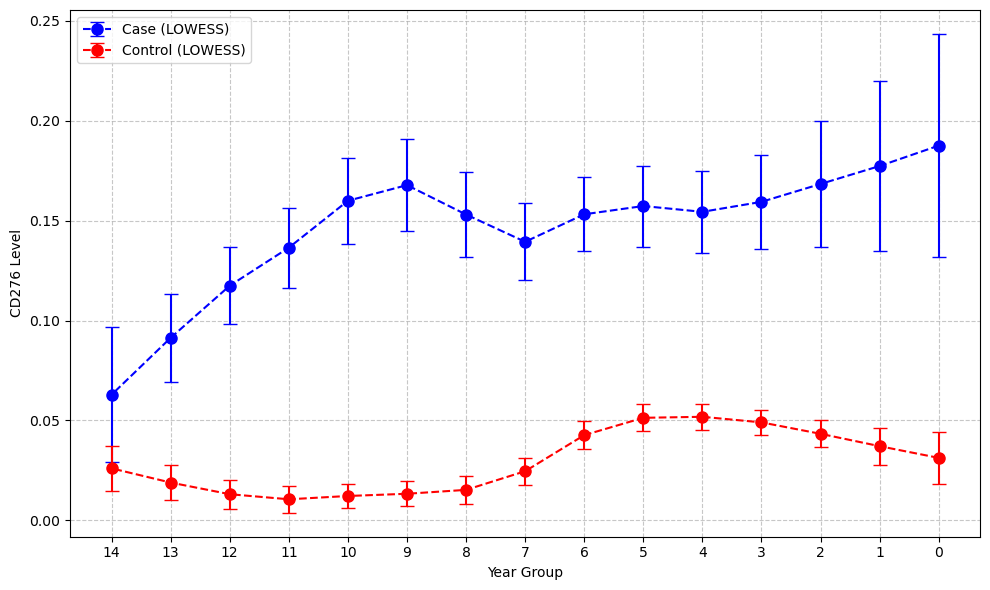

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


matched_data_path = '/code/Figure2/Figure2c/matched_samples_CD276_v3.csv'
matched_data = pd.read_csv(matched_data_path)


raw_data1 = matched_data[matched_data['dataset'] == "A"][['Year_group', 'CD276']].sort_values('Year_group')
raw_data2 = matched_data[matched_data['dataset'] == "B"][['Year_group', 'CD276']].sort_values('Year_group')


def lowess_with_bootstrap(x, y, frac=0.3, n_bootstrap=100):
   
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
    
    bootstrap_preds = []
    
   
    for _ in range(n_bootstrap):
        
        sample_idx = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x[sample_idx]
        y_sample = y[sample_idx]
        
        
        lowess = sm.nonparametric.lowess(y_sample, x_sample, frac=frac)
        x_pred = lowess[:, 0]
        y_pred = lowess[:, 1]
        
       
        x_unique = np.unique(x)
        y_interp = np.interp(x_unique, x_pred, y_pred)
        bootstrap_preds.append(y_interp)
    
    
    pred_mean = np.mean(bootstrap_preds, axis=0)
    pred_se = np.std(bootstrap_preds, axis=0, ddof=1)  # 無偏估計
    
    return x_unique, pred_mean, pred_se

frac = 0.4 


x1 = raw_data1['Year_group'].values
y1 = raw_data1['CD276'].values
x1_unique, y1_mean, y1_se = lowess_with_bootstrap(x1, y1, frac=frac)


x2 = raw_data2['Year_group'].values
y2 = raw_data2['CD276'].values
x2_unique, y2_mean, y2_se = lowess_with_bootstrap(x2, y2, frac=frac)


plt.figure(figsize=(10, 6))


plt.errorbar(x1_unique, y1_mean, yerr=y1_se, 
             label='Case (LOWESS)', fmt='o--', color='blue', 
             capsize=5, markersize=8)

plt.errorbar(x2_unique, y2_mean, yerr=y2_se, 
             label='Control (LOWESS)', fmt='o--', color='red', 
             capsize=5, markersize=8)


plt.gca().invert_xaxis()
plt.xticks(np.union1d(x1_unique, x2_unique))  
plt.xlabel('Year Group')
plt.ylabel('CD276 Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('/results/figure2cCD276_trajectory.pdf', 
            format='pdf', bbox_inches='tight')

plt.show()

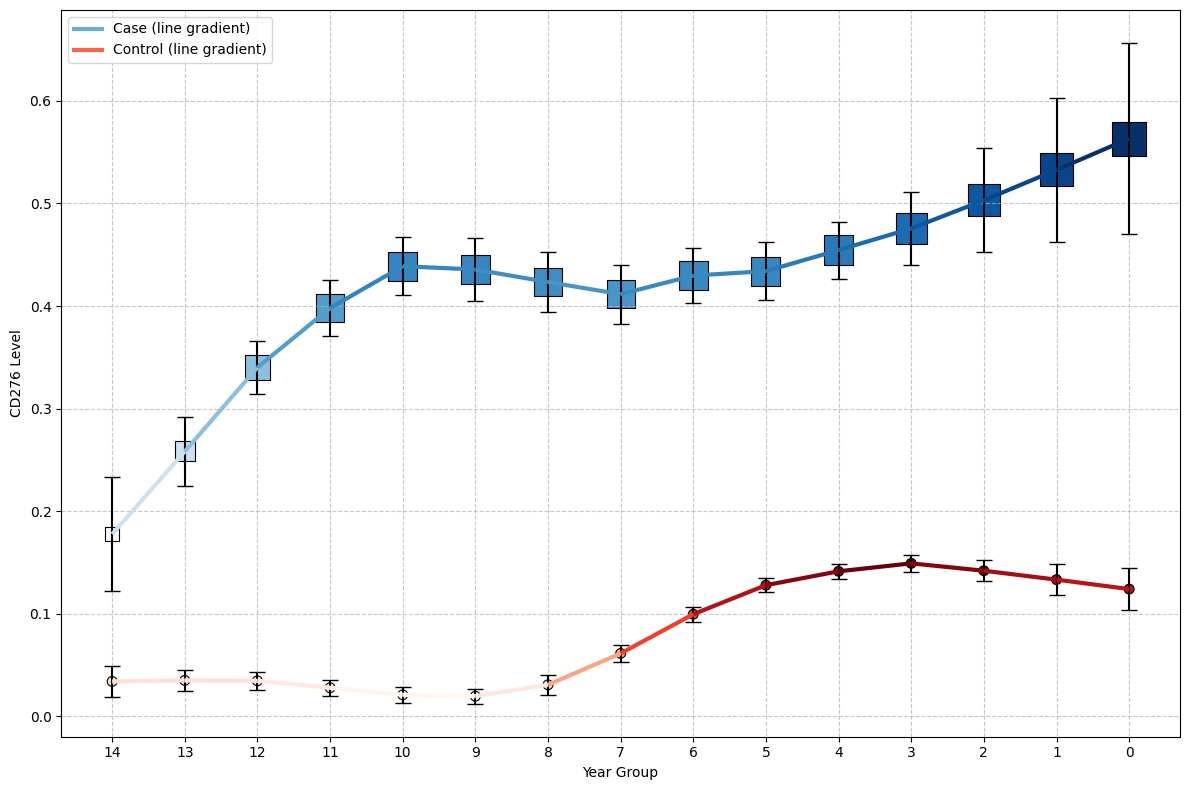

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def plot_gradient_line(ax, x, y, cmap_name, line_width=3):
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    lc = LineCollection(
        segments,
        cmap=plt.get_cmap(cmap_name),
        norm=norm,
        linewidth=line_width
    )
    lc.set_array(y)  
    ax.add_collection(lc)
    return lc


fig, ax = plt.subplots(figsize=(12, 8))  

 
min_size, max_size = 100, 600
if y1_mean.max() != y1_mean.min():
    y1_norm = (y1_mean - y1_mean.min()) / (y1_mean.max() - y1_mean.min())
else:
    y1_norm = np.full_like(y1_mean, 0.5)
s1 = min_size + (max_size - min_size) * y1_norm


ax.errorbar(
    x1_unique, y1_mean, yerr=y1_se,
    fmt='none',
    ecolor='black',     
    elinewidth=1.5,
    capsize=6
)


sc1 = ax.scatter(
    x1_unique, y1_mean,
    s=s1,                        
    c=y1_mean,                   
    cmap='Blues',                
    marker='s',                  
    edgecolors='black',          
    linewidths=0.8               
)


gradient_a = plot_gradient_line(ax, x1_unique, y1_mean, cmap_name='Blues', line_width=3)




min_size, max_size = 50, 50
if y2_mean.max() != y2_mean.min():
    y2_norm = (y2_mean - y2_mean.min()) / (y2_mean.max() - y2_mean.min())
else:
    y2_norm = np.full_like(y2_mean, 0.5)
s2 = min_size + (max_size - min_size) * y2_norm


ax.errorbar(
    x2_unique, y2_mean, yerr=y2_se,
    fmt='none',
    ecolor='black',
    elinewidth=1.5,
    capsize=6
)


sc2 = ax.scatter(
    x2_unique, y2_mean,
    s=s2,
    c=y2_mean,
    cmap='Reds',
    marker='o',                  
    edgecolors='black',
    linewidths=0.8
)


gradient_b = plot_gradient_line(ax, x2_unique, y2_mean, cmap_name='Reds', line_width=3)



ax.invert_xaxis()
ax.set_xticks(np.union1d(x1_unique, x2_unique))
ax.set_xlabel('Year Group')
ax.set_ylabel('CD276 Level')
ax.grid(True, linestyle='--', alpha=0.7)


import matplotlib.lines as mlines
proxy_a = mlines.Line2D([], [], color=plt.get_cmap('Blues')(0.5), lw=3, label='Case (line gradient)')
proxy_b = mlines.Line2D([], [], color=plt.get_cmap('Reds')(0.5), lw=3, label='Control (line gradient)')
ax.legend(handles=[proxy_a, proxy_b], loc='best')

plt.tight_layout()

plt.savefig('/results/figure2cCD276_trajectory.pdf', format='pdf', bbox_inches='tight')
plt.show()

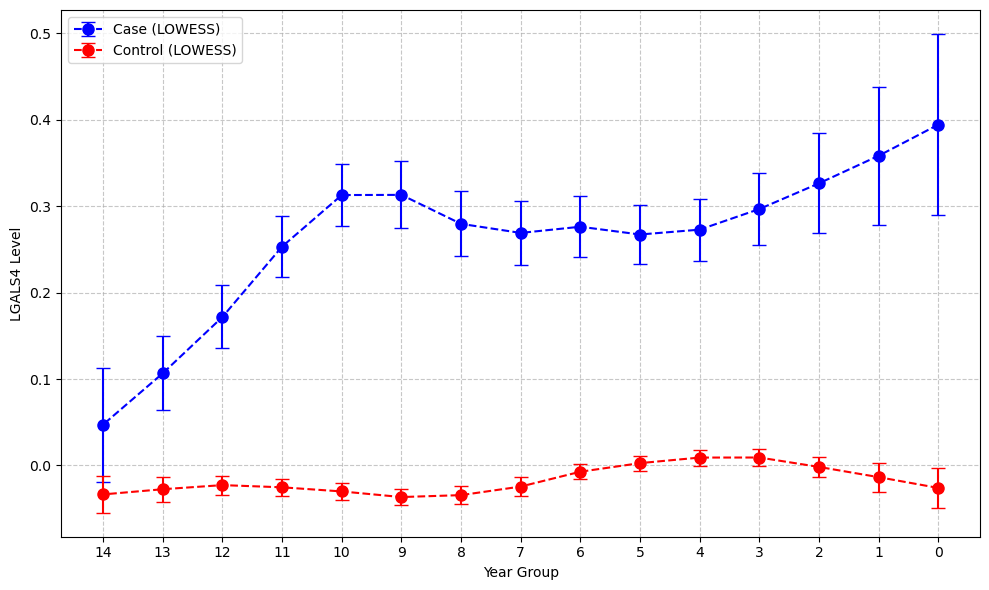

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


matched_data_path = '/code/Figure2/Figure2c/matched_samples_LGALS4_v2.csv'
matched_data = pd.read_csv(matched_data_path)


raw_data1 = matched_data[matched_data['dataset'] == "A"][['Year_group', 'LGALS4']].sort_values('Year_group')
raw_data2 = matched_data[matched_data['dataset'] == "B"][['Year_group', 'LGALS4']].sort_values('Year_group')


def lowess_with_bootstrap(x, y, frac=0.3, n_bootstrap=100):
   
    
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
    
    bootstrap_preds = []
    
    
    for _ in range(n_bootstrap):
        
        sample_idx = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x[sample_idx]
        y_sample = y[sample_idx]
        
        
        lowess = sm.nonparametric.lowess(y_sample, x_sample, frac=frac)
        x_pred = lowess[:, 0]
        y_pred = lowess[:, 1]
        
        
        x_unique = np.unique(x)
        y_interp = np.interp(x_unique, x_pred, y_pred)
        bootstrap_preds.append(y_interp)
    
    
    pred_mean = np.mean(bootstrap_preds, axis=0)
    pred_se = np.std(bootstrap_preds, axis=0, ddof=1)  
    
    return x_unique, pred_mean, pred_se


frac = 0.4  


x1 = raw_data1['Year_group'].values
y1 = raw_data1['LGALS4'].values
x1_unique, y1_mean, y1_se = lowess_with_bootstrap(x1, y1, frac=frac)


x2 = raw_data2['Year_group'].values
y2 = raw_data2['LGALS4'].values
x2_unique, y2_mean, y2_se = lowess_with_bootstrap(x2, y2, frac=frac)


plt.figure(figsize=(10, 6))


plt.errorbar(x1_unique, y1_mean, yerr=y1_se, 
             label='Case (LOWESS)', fmt='o--', color='blue', 
             capsize=5, markersize=8)


plt.errorbar(x2_unique, y2_mean, yerr=y2_se, 
             label='Control (LOWESS)', fmt='o--', color='red', 
             capsize=5, markersize=8)


plt.gca().invert_xaxis()
plt.xticks(np.union1d(x1_unique, x2_unique)) 
plt.xlabel('Year Group')
plt.ylabel('LGALS4 Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('/results/Figure2cLGALS4_trajectory.pdf', 
            format='pdf', bbox_inches='tight')

plt.show()

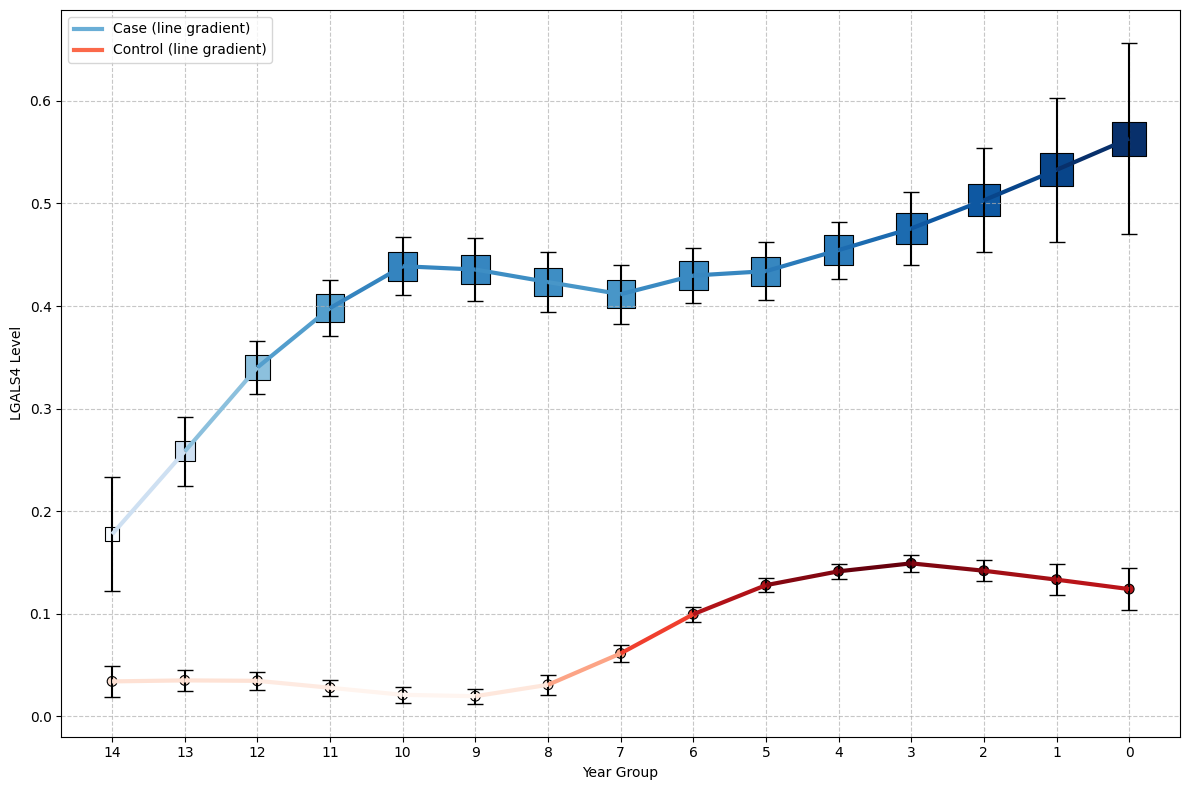

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def plot_gradient_line(ax, x, y, cmap_name, line_width=3):
   
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    lc = LineCollection(
        segments,
        cmap=plt.get_cmap(cmap_name),
        norm=norm,
        linewidth=line_width
    )
    lc.set_array(y)  
    ax.add_collection(lc)
    return lc


fig, ax = plt.subplots(figsize=(12, 8))  


min_size, max_size = 100, 600
if y1_mean.max() != y1_mean.min():
    y1_norm = (y1_mean - y1_mean.min()) / (y1_mean.max() - y1_mean.min())
else:
    y1_norm = np.full_like(y1_mean, 0.5)
s1 = min_size + (max_size - min_size) * y1_norm


ax.errorbar(
    x1_unique, y1_mean, yerr=y1_se,
    fmt='none',
    ecolor='black',     
    elinewidth=1.5,
    capsize=6
)


sc1 = ax.scatter(
    x1_unique, y1_mean,
    s=s1,                        
    c=y1_mean,                   
    cmap='Blues',                
    marker='s',                  
    edgecolors='black',          
    linewidths=0.8               
)


gradient_a = plot_gradient_line(ax, x1_unique, y1_mean, cmap_name='Blues', line_width=3)



min_size, max_size = 50, 50
if y2_mean.max() != y2_mean.min():
    y2_norm = (y2_mean - y2_mean.min()) / (y2_mean.max() - y2_mean.min())
else:
    y2_norm = np.full_like(y2_mean, 0.5)
s2 = min_size + (max_size - min_size) * y2_norm


ax.errorbar(
    x2_unique, y2_mean, yerr=y2_se,
    fmt='none',
    ecolor='black',
    elinewidth=1.5,
    capsize=6
)


sc2 = ax.scatter(
    x2_unique, y2_mean,
    s=s2,
    c=y2_mean,
    cmap='Reds',
    marker='o',               
    edgecolors='black',
    linewidths=0.8
)


gradient_b = plot_gradient_line(ax, x2_unique, y2_mean, cmap_name='Reds', line_width=3)



ax.invert_xaxis()
ax.set_xticks(np.union1d(x1_unique, x2_unique))
ax.set_xlabel('Year Group')
ax.set_ylabel('LGALS4 Level')
ax.grid(True, linestyle='--', alpha=0.7)


import matplotlib.lines as mlines
proxy_a = mlines.Line2D([], [], color=plt.get_cmap('Blues')(0.5), lw=3, label='Case (line gradient)')
proxy_b = mlines.Line2D([], [], color=plt.get_cmap('Reds')(0.5), lw=3, label='Control (line gradient)')
ax.legend(handles=[proxy_a, proxy_b], loc='best')

plt.tight_layout()

plt.savefig('/results/figure2cLGALS4_trajectory.pdf', format='pdf', bbox_inches='tight')
plt.show()

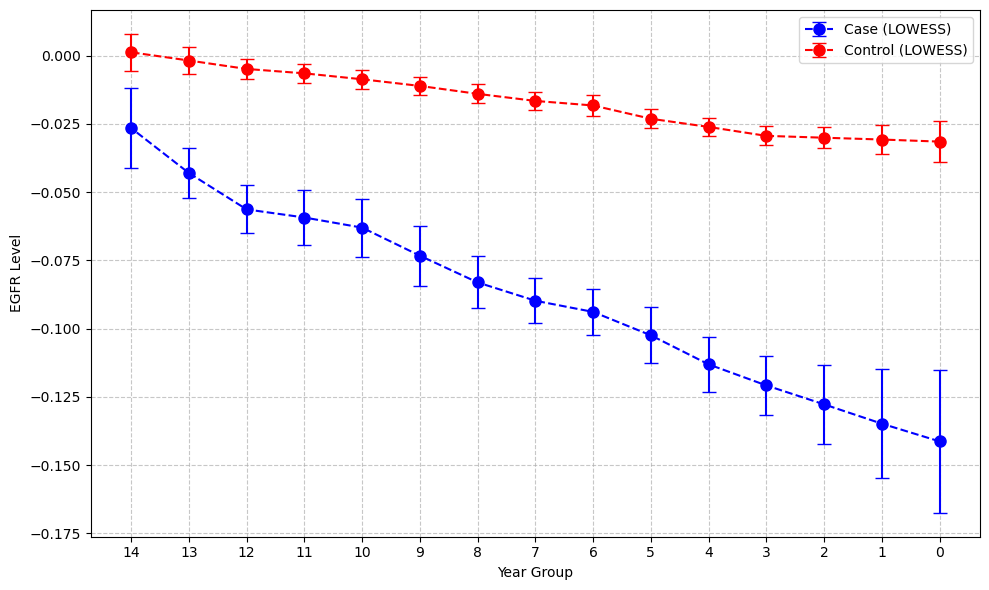

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


matched_data_path = '/code/Figure2/Figure2c/matched_samples_EGFR_v2.csv'
matched_data = pd.read_csv(matched_data_path)


raw_data1 = matched_data[matched_data['dataset'] == "A"][['Year_group', 'EGFR']].sort_values('Year_group')
raw_data2 = matched_data[matched_data['dataset'] == "B"][['Year_group', 'EGFR']].sort_values('Year_group')


def lowess_with_bootstrap(x, y, frac=0.3, n_bootstrap=100):
 
    x = np.asarray(x, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)
    
    
    bootstrap_preds = []
    
    
    for _ in range(n_bootstrap):
        
        sample_idx = np.random.choice(len(x), size=len(x), replace=True)
        x_sample = x[sample_idx]
        y_sample = y[sample_idx]
        
        
        lowess = sm.nonparametric.lowess(y_sample, x_sample, frac=frac)
        x_pred = lowess[:, 0]
        y_pred = lowess[:, 1]
        
        
        x_unique = np.unique(x)
        y_interp = np.interp(x_unique, x_pred, y_pred)
        bootstrap_preds.append(y_interp)
    
   
    pred_mean = np.mean(bootstrap_preds, axis=0)
    pred_se = np.std(bootstrap_preds, axis=0, ddof=1) 
    
    return x_unique, pred_mean, pred_se


frac = 0.4  


x1 = raw_data1['Year_group'].values
y1 = raw_data1['EGFR'].values
x1_unique, y1_mean, y1_se = lowess_with_bootstrap(x1, y1, frac=frac)


x2 = raw_data2['Year_group'].values
y2 = raw_data2['EGFR'].values
x2_unique, y2_mean, y2_se = lowess_with_bootstrap(x2, y2, frac=frac)


plt.figure(figsize=(10, 6))


plt.errorbar(x1_unique, y1_mean, yerr=y1_se, 
             label='Case (LOWESS)', fmt='o--', color='blue', 
             capsize=5, markersize=8)


plt.errorbar(x2_unique, y2_mean, yerr=y2_se, 
             label='Control (LOWESS)', fmt='o--', color='red', 
             capsize=5, markersize=8)


plt.gca().invert_xaxis()
plt.xticks(np.union1d(x1_unique, x2_unique))  
plt.xlabel('Year Group')
plt.ylabel('EGFR Level')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('/results/figure2cEGFR_trajectory.pdf', 
            format='pdf', bbox_inches='tight')

plt.show()

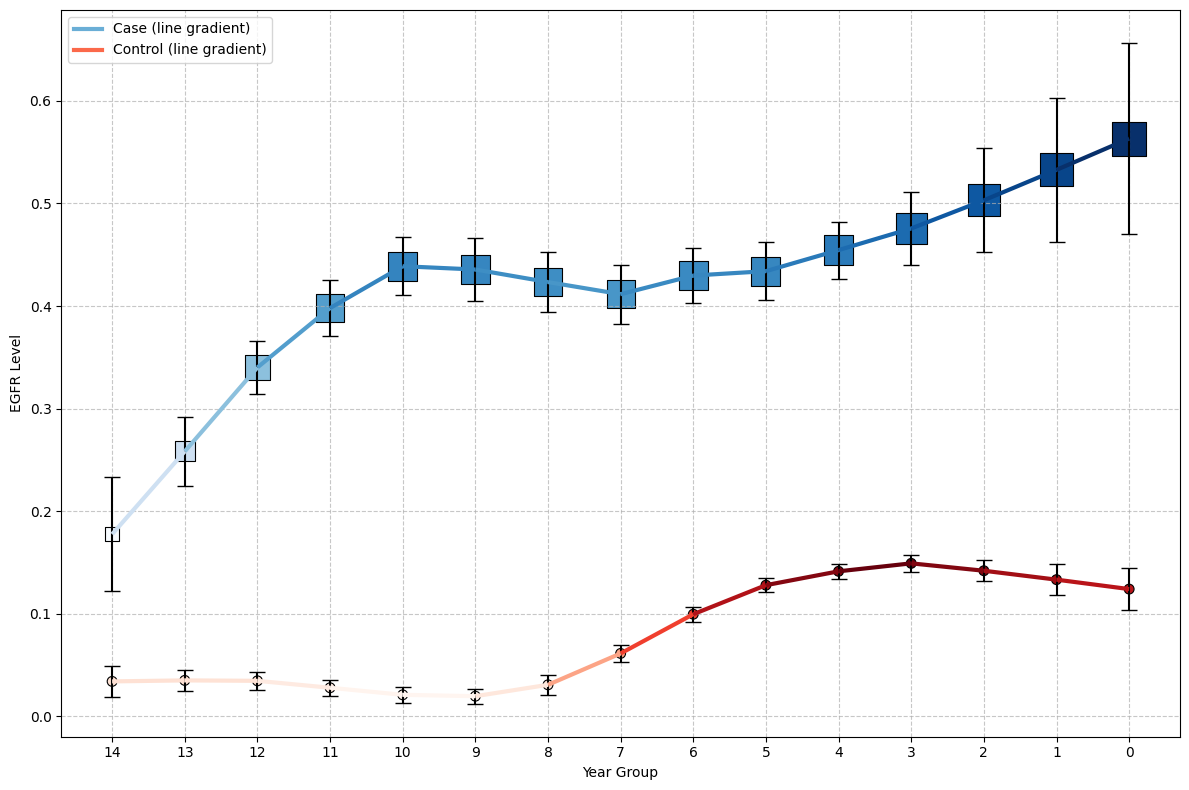

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def plot_gradient_line(ax, x, y, cmap_name, line_width=3):
   
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    norm = mpl.colors.Normalize(vmin=np.min(y), vmax=np.max(y))
    lc = LineCollection(
        segments,
        cmap=plt.get_cmap(cmap_name),
        norm=norm,
        linewidth=line_width
    )
    lc.set_array(y)  
    ax.add_collection(lc)
    return lc


fig, ax = plt.subplots(figsize=(12, 8))  

 
min_size, max_size = 100, 600
if y1_mean.max() != y1_mean.min():
    y1_norm = (y1_mean - y1_mean.min()) / (y1_mean.max() - y1_mean.min())
else:
    y1_norm = np.full_like(y1_mean, 0.5)
s1 = min_size + (max_size - min_size) * y1_norm


ax.errorbar(
    x1_unique, y1_mean, yerr=y1_se,
    fmt='none',
    ecolor='black',     
    elinewidth=1.5,
    capsize=6
)


sc1 = ax.scatter(
    x1_unique, y1_mean,
    s=s1,                        
    c=y1_mean,                   
    cmap='Blues',                
    marker='s',                  
    edgecolors='black',          
    linewidths=0.8               
)


gradient_a = plot_gradient_line(ax, x1_unique, y1_mean, cmap_name='Blues', line_width=3)




min_size, max_size = 50, 50
if y2_mean.max() != y2_mean.min():
    y2_norm = (y2_mean - y2_mean.min()) / (y2_mean.max() - y2_mean.min())
else:
    y2_norm = np.full_like(y2_mean, 0.5)
s2 = min_size + (max_size - min_size) * y2_norm


ax.errorbar(
    x2_unique, y2_mean, yerr=y2_se,
    fmt='none',
    ecolor='black',
    elinewidth=1.5,
    capsize=6
)


sc2 = ax.scatter(
    x2_unique, y2_mean,
    s=s2,
    c=y2_mean,
    cmap='Reds',
    marker='o',                
    edgecolors='black',
    linewidths=0.8
)


gradient_b = plot_gradient_line(ax, x2_unique, y2_mean, cmap_name='Reds', line_width=3)



ax.invert_xaxis()
ax.set_xticks(np.union1d(x1_unique, x2_unique))
ax.set_xlabel('Year Group')
ax.set_ylabel('EGFR Level')
ax.grid(True, linestyle='--', alpha=0.7)


import matplotlib.lines as mlines
proxy_a = mlines.Line2D([], [], color=plt.get_cmap('Blues')(0.5), lw=3, label='Case (line gradient)')
proxy_b = mlines.Line2D([], [], color=plt.get_cmap('Reds')(0.5), lw=3, label='Control (line gradient)')
ax.legend(handles=[proxy_a, proxy_b], loc='best')

plt.tight_layout()

plt.savefig('/results/figure2ccEGFR_trajectory.pdf', format='pdf', bbox_inches='tight')
plt.show()